In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dimension = 2
points = 3

In [ ]:
def creerPoints(centre, rayon, nb_points=points, nb_dimensions=dimension):
    result = np.zeros((nb_points, nb_dimensions))
    for j in range(nb_dimensions):
        result[:, j] += centre[j]
    for i in range(nb_points):
        r = rayon*np.random.uniform(0, 1)
        theta = np.random.uniform(0, 2*np.pi)
        result[i, 0] += r*np.cos(theta)
        result[i, 1] += r*np.sin(theta)
    return result

def creerClusters(c1, r1, c2, r2, nb_dimensions=dimension, nb_points=points, createur=creerPoints):
    return createur(c1, r1, nb_points, nb_dimensions), createur(c2, r2, nb_points, nb_dimensions)

def euc_lin(p1, p2, nb_dimensions=dimension, hyperparametre=1):
    x = p2-p1
    return hyperparametre*np.sqrt(np.dot(x, x))

def euc_quadra(p1, p2, nb_dimensions=dimension, hyperparametre=1):
    x = p2-p1
    return hyperparametre*np.dot(x, x)

def cout(p1, p2, nb_dimensions=dimension, fct_cout=euc_quadra, hyperparametre=1):
    return fct_cout(p1, p2, nb_dimensions, hyperparametre)

def creerMatriceCout(source, destination, fct_cout=euc_quadra, hyperparametre=1):
    n, p = source.shape
    C = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            C[i, j] = cout(source[i, :], destination[j, :], fct_cout=fct_cout, hyperparametre=hyperparametre)
    return C

def trouverCheminsAugmentants(adj, x):
    pass

def est_sature(i, j, c, phi, psi):
    return phi[i]+psi[j] == c[i, j]

def hongrois(source, destination):
    n, p = source.shape
    c = np.array([[1, 4, 2], [3, 5, 6], [2, 1, 3]]) #creerMatriceCout(source, destination)
    x = np.zeros_like(c)
    adj = np.zeros_like(c)
    phi = np.zeros(n)
    psi = np.zeros(n)

    # initialisation

    for i in range(n):
        phi[i] = np.min(c[i, :])
    
    for j in range(n):
        psi[j] = np.min(c[:, j]-phi)

    for i in range(n):
        for j in range(n):
            if est_sature(i, j, c, phi, psi):
                adj[i, j] = 1

    for i in range(n):
        for j in range(n):
            if (adj[i, j] == 1 and not(1 in x[:, j])):
                x[i, j] = 1
                break

    # boucle principale

    return x, phi, psi, adj

def afficherClusters(source, destination):
    plt.plot(source[:, 0], source[:, 1], 'or')
    plt.plot(destination[:, 0], destination[:, 1], 'ob')
    plt.show()

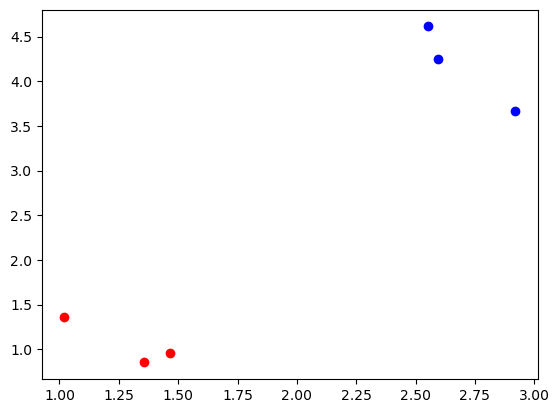

[[12.11490556  9.483759   14.56736369]
 [13.0729334  10.39425427 15.59206528]
 [10.81940227  8.94391471 12.938663  ]]


In [54]:
c1, r1 = [1, 1], 0.5
c2, r2 = [3, 4], 0.8

A, B = creerClusters(c1, r1, c2, r2)
C = creerMatriceCout(A, B, fct_cout=euc_quadra)

afficherClusters(A, B)
print(C)

In [55]:
x, phi, psi, adj = hongrois(A, B)
print(x)
print(adj)


[[1 0 0]
 [0 0 0]
 [0 1 0]]
[[1 0 1]
 [1 0 0]
 [0 1 0]]
